<a href="https://colab.research.google.com/github/PSLMssGerd44/Python-Data-analysis-ML-DL-proyects/blob/main/Final_Hotel_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy.stats import skewtest, levene
from scipy import stats
from scipy import optimize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.datasets import *
from keras.models import Sequential 
from keras.layers import Dense, Embedding 
from keras.layers import LSTM 
from keras.preprocessing.sequence import TimeseriesGenerator


In [ ]:
!pip install -q xlrd

#Análisis exploratorio

In [ ]:
df = pd.read_excel('/content/Data_hotels_online_SIT.xlsx')
df

,hot__id,hot_nombre,hot_fecha,hot_latitud,hot_longitud,hot_puntuacion,hot_posicionranking,hot_ranking,hot_direccion,hot_correo,...,hot_habitaciones,hot_camas,hot_num_emp,hot_evaluacion,hot_comuna,hot_zona,hot_categoria,hot_rangoprecios,hot_preciomin,hot_preciomax
0,13483867,14 Urban Hotel,2022-07-19,6.208150,-75.56614,4.5,72,N.º 72 en relación calidad-precio de 1.004 lug...,"8a74 Carrera 36, Medellín 050021 Colombia",gerencia@14urbanhotel.com,...,NaN,NaN,NaN,OK,El Poblado,El Poblado,5,$ 234.783 - $ 321.739,234783.0,321739.0
1,13483867,14 Urban Hotel,2022-03-11,6.208150,-75.56614,4.5,87,N.º 87 en relación calidad-precio de 986 lugar...,"8a74 Carrera 36, Medellín 050021 Colombia",gerencia@14urbanhotel.com,...,NaN,NaN,NaN,OK,El Poblado,El Poblado,5,$ 131.579 - $ 266.917,131579.0,266917.0
2,21213076,10A Apartments,2022-06-30,6.218380,-75.59420,NaN,753,N.º 753 en relación calidad-precio de 1.004 lu...,"Calle 10A #43A -11, Medellín 050021 Colombia",NaN,...,NaN,NaN,NaN,OK,El Poblado,El Poblado,5,$ 327.869 - $ 381.148,327869.0,381148.0
3,23099462,23 Hotel,2022-06-06,6.205157,-75.56453,4.5,22,N.º 22 en relación calidad-precio de 1.001 lug...,"Carrera 34 #5G – 62, Medellín Colombia",info@23hotel.co,...,NaN,NaN,NaN,OK,El Poblado,El Poblado,5,$ 381.132 - $ 509.434,381132.0,509434.0
4,13483867,14 Urban Hotel,2022-07-28,6.208150,-75.56614,4.5,65,N.º 65 en relación calidad-precio de 1.005 lug...,"8a74 Carrera 36, Medellín 050021 Colombia",gerencia@14urbanhotel.com,...,NaN,NaN,NaN,OK,El Poblado,El Poblado,5,$ 238.938 - $ 318.584,238938.0,318584.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150165,1598697,hotel cabo de la vela,2022-06-11,6.246542,-75.59007,4.0,18,N.º 18 en relación calidad-precio de 1.002 lug...,"circular 4 #70-72, Medellín 050031 Colombia",comercial@hotelcabodelavela.com,...,34.0,530.0,1.0,OK,Laureles Estadio,Laureles Estadio,2,$ 100.775 - $ 135.659,100775.0,135659.0
150166,1598697,hotel cabo de la vela,2022-08-07,6.246542,-75.59007,4.0,6,N.º 6 en relación calidad-precio de 1.005 luga...,"circular 4 #70-72, Medellín 050031 Colombia",comercial@hotelcabodelavela.com,...,34.0,530.0,1.0,OK,Laureles Estadio,Laureles Estadio,2,$ 108.696 - $ 143.478,108696.0,143478.0
150167,10505896,Your Home Away From Home Calasanz,2021-08-26,6.265780,-75.56232,NaN,573,N.º 573 en relación calidad-precio de 949 luga...,"Carrera 81B # 51-38, Medellín 050035 Colombia",NaN,...,NaN,NaN,NaN,OK,La América,Laureles Estadio,5,$ 38.760 - $ 62.016,38760.0,62016.0
150168,2225136,Tryp Medellin,2021-12-25,6.259060,-75.58701,3.5,204,N.º 204 en relación calidad-precio de 969 luga...,"Calle 50 (Calle Colombia) # 70 - 124, Medellín...",info@trypmedellin.com,...,140.0,2270.0,8.0,OK,Laureles Estadio,Laureles Estadio,1,$ 164.000 - $ 348.000,164000.0,348000.0


In [ ]:
df.dtypes

hot__id                     int64
hot_nombre                 object
hot_fecha                  object
hot_latitud               float64
hot_longitud              float64
hot_puntuacion            float64
hot_posicionranking         int64
hot_ranking                object
hot_direccion              object
hot_correo                 object
hot_numcontacto            object
hot_urltripadvisor         object
hot_servicios              object
hot_estacionescercanas     object
hot_tipshabitaciones       object
hot_descripcion            object
hot_web                    object
hot_habitaciones          float64
hot_camas                 float64
hot_num_emp               float64
hot_evaluacion             object
hot_comuna                 object
hot_zona                   object
hot_categoria               int64
hot_rangoprecios           object
hot_preciomin             float64
hot_preciomax             float64
dtype: object

In [ ]:
df.shape

(150170, 27)

In [ ]:
df.describe()

,hot__id,hot_latitud,hot_longitud,hot_puntuacion,hot_posicionranking,hot_habitaciones,hot_camas,hot_num_emp,hot_categoria,hot_preciomin,hot_preciomax
count,1.501700e+05,148285.000000,148285.000000,113572.000000,150170.000000,53519.000000,53519.000000,53519.000000,150170.000000,1.501700e+05,1.501700e+05
mean,1.123070e+07,6.235152,-75.575548,3.913337,360.083405,35.518750,605.551113,12.941908,4.216674,1.188124e+05,2.077310e+05
std,6.780840e+06,0.159402,0.111355,0.893228,267.412490,44.398782,762.953074,24.568766,1.245856,1.048678e+05,2.131444e+05
min,2.991050e+05,4.536705,-79.361380,1.000000,1.000000,2.000000,20.000000,1.000000,1.000000,1.287600e+04,1.785700e+04
25%,4.227589e+06,6.209518,-75.588830,3.500000,138.000000,11.000000,200.000000,3.000000,4.000000,5.364000e+04,9.200000e+04
50%,1.228166e+07,6.238636,-75.573006,4.000000,290.000000,20.000000,360.000000,5.000000,5.000000,8.396900e+04,1.441050e+05
75%,1.742734e+07,6.250171,-75.565475,4.500000,581.000000,39.000000,650.000000,12.000000,5.000000,1.475410e+05,2.475772e+05
max,2.395971e+07,11.002205,-74.124110,5.000000,960.000000,298.000000,5440.000000,185.000000,5.000000,1.715596e+06,3.634146e+06


In [ ]:
df.columns

Index(['hot__id', 'hot_nombre', 'hot_fecha', 'hot_latitud', 'hot_longitud',
       'hot_puntuacion', 'hot_posicionranking', 'hot_ranking', 'hot_direccion',
       'hot_correo', 'hot_numcontacto', 'hot_urltripadvisor', 'hot_servicios',
       'hot_estacionescercanas', 'hot_tipshabitaciones', 'hot_descripcion',
       'hot_web', 'hot_habitaciones', 'hot_camas', 'hot_num_emp',
       'hot_evaluacion', 'hot_comuna', 'hot_zona', 'hot_categoria',
       'hot_rangoprecios', 'hot_preciomin', 'hot_preciomax'],
      dtype='object')

In [ ]:
df.describe(exclude='object')

,hot__id,hot_latitud,hot_longitud,hot_puntuacion,hot_posicionranking,hot_habitaciones,hot_camas,hot_num_emp,hot_categoria,hot_preciomin,hot_preciomax
count,1.501700e+05,148285.000000,148285.000000,113572.000000,150170.000000,53519.000000,53519.000000,53519.000000,150170.000000,1.501700e+05,1.501700e+05
mean,1.123070e+07,6.235152,-75.575548,3.913337,360.083405,35.518750,605.551113,12.941908,4.216674,1.188124e+05,2.077310e+05
std,6.780840e+06,0.159402,0.111355,0.893228,267.412490,44.398782,762.953074,24.568766,1.245856,1.048678e+05,2.131444e+05
min,2.991050e+05,4.536705,-79.361380,1.000000,1.000000,2.000000,20.000000,1.000000,1.000000,1.287600e+04,1.785700e+04
25%,4.227589e+06,6.209518,-75.588830,3.500000,138.000000,11.000000,200.000000,3.000000,4.000000,5.364000e+04,9.200000e+04
50%,1.228166e+07,6.238636,-75.573006,4.000000,290.000000,20.000000,360.000000,5.000000,5.000000,8.396900e+04,1.441050e+05
75%,1.742734e+07,6.250171,-75.565475,4.500000,581.000000,39.000000,650.000000,12.000000,5.000000,1.475410e+05,2.475772e+05
max,2.395971e+07,11.002205,-74.124110,5.000000,960.000000,298.000000,5440.000000,185.000000,5.000000,1.715596e+06,3.634146e+06


In [ ]:
df.isna().sum()*100/df.shape[0]

hot__id                    0.000000
hot_nombre                 0.000000
hot_fecha                  0.000000
hot_latitud                1.255244
hot_longitud               1.255244
hot_puntuacion            24.371046
hot_posicionranking        0.000000
hot_ranking                0.000000
hot_direccion              0.000000
hot_correo                40.964906
hot_numcontacto           29.463941
hot_urltripadvisor         0.000000
hot_servicios              0.000000
hot_estacionescercanas     0.000000
hot_tipshabitaciones       0.000000
hot_descripcion           51.008191
hot_web                   38.017580
hot_habitaciones          64.361057
hot_camas                 64.361057
hot_num_emp               64.361057
hot_evaluacion             0.000000
hot_comuna                 0.000000
hot_zona                   0.000000
hot_categoria              0.000000
hot_rangoprecios           0.000000
hot_preciomin              0.000000
hot_preciomax              0.000000
dtype: float64

In [ ]:
df.isnull().sum()

hot__id                       0
hot_nombre                    0
hot_fecha                     0
hot_latitud                1885
hot_longitud               1885
hot_puntuacion            36598
hot_posicionranking           0
hot_ranking                   0
hot_direccion                 0
hot_correo                61517
hot_numcontacto           44246
hot_urltripadvisor            0
hot_servicios                 0
hot_estacionescercanas        0
hot_tipshabitaciones          0
hot_descripcion           76599
hot_web                   57091
hot_habitaciones          96651
hot_camas                 96651
hot_num_emp               96651
hot_evaluacion                0
hot_comuna                    0
hot_zona                      0
hot_categoria                 0
hot_rangoprecios              0
hot_preciomin                 0
hot_preciomax                 0
dtype: int64

In [ ]:
df1=df.drop(['hot_latitud', 'hot_longitud',
       'hot_puntuacion', 'hot_posicionranking', 'hot_ranking', 'hot_direccion',
       'hot_correo', 'hot_numcontacto', 'hot_urltripadvisor', 'hot_servicios',        #drop de columnas innecesarias
       'hot_estacionescercanas', 'hot_tipshabitaciones', 'hot_descripcion',
       'hot_web', 'hot_habitaciones', 'hot_camas', 'hot_num_emp',
       'hot_evaluacion', 'hot_comuna'], axis=1)

In [ ]:
df1.columns

Index(['hot__id', 'hot_nombre', 'hot_fecha', 'hot_zona', 'hot_categoria',
       'hot_rangoprecios', 'hot_preciomin', 'hot_preciomax'],
      dtype='object')

In [ ]:
df1.isnull().sum()

hot__id             0
hot_nombre          0
hot_fecha           0
hot_zona            0
hot_categoria       0
hot_rangoprecios    0
hot_preciomin       0
hot_preciomax       0
dtype: int64

In [ ]:
df1

,hot__id,hot_nombre,hot_fecha,hot_zona,hot_categoria,hot_rangoprecios,hot_preciomin,hot_preciomax
0,13483867,14 Urban Hotel,2022-07-19,El Poblado,5,$ 234.783 - $ 321.739,234783.0,321739.0
1,13483867,14 Urban Hotel,2022-03-11,El Poblado,5,$ 131.579 - $ 266.917,131579.0,266917.0
2,21213076,10A Apartments,2022-06-30,El Poblado,5,$ 327.869 - $ 381.148,327869.0,381148.0
3,23099462,23 Hotel,2022-06-06,El Poblado,5,$ 381.132 - $ 509.434,381132.0,509434.0
4,13483867,14 Urban Hotel,2022-07-28,El Poblado,5,$ 238.938 - $ 318.584,238938.0,318584.0
...,...,...,...,...,...,...,...,...
150165,1598697,hotel cabo de la vela,2022-06-11,Laureles Estadio,2,$ 100.775 - $ 135.659,100775.0,135659.0
150166,1598697,hotel cabo de la vela,2022-08-07,Laureles Estadio,2,$ 108.696 - $ 143.478,108696.0,143478.0
150167,10505896,Your Home Away From Home Calasanz,2021-08-26,Laureles Estadio,5,$ 38.760 - $ 62.016,38760.0,62016.0
150168,2225136,Tryp Medellin,2021-12-25,Laureles Estadio,1,$ 164.000 - $ 348.000,164000.0,348000.0


In [ ]:
df1['hot_fecha'] = pd.to_datetime(df['hot_fecha'])    #formato a columna fecha

In [ ]:
df1.columns

Index(['hot__id', 'hot_nombre', 'hot_fecha', 'hot_zona', 'hot_categoria',
       'hot_rangoprecios', 'hot_preciomin', 'hot_preciomax'],
      dtype='object')

In [ ]:
df11=df1.groupby(pd.Grouper(key='hot_fecha', freq='1M')).sum()      #intento de seleccionar por fecha
df11

,hot__id,hot_categoria,hot_preciomin,hot_preciomax
hot_fecha,,,,
2021-08-31,44861766540,17797,4.219434e+08,8.142134e+08
2021-09-30,167695933386,66475,1.563132e+09,3.015638e+09
2021-10-31,173868146648,68823,1.598233e+09,3.064242e+09
2021-11-30,94841828999,37470,8.842513e+08,1.673555e+09
2021-12-31,75539099321,29608,7.251101e+08,1.390050e+09
2022-01-31,132907427566,51948,1.292934e+09,2.478368e+09
2022-02-28,116173769629,45465,1.105192e+09,2.132838e+09
2022-03-31,170605321727,66700,1.572729e+09,3.041279e+09
2022-04-30,81305712804,32043,7.397135e+08,1.429274e+09


In [ ]:
grouped = df1.groupby('hot_nombre')
for hot_nombre, group in grouped:
  print(hot_nombre)
  print(group)

Streaming output truncated to the last 5000 lines.
La Martina Hotel Boutique
         hot__id                 hot_nombre  hot_fecha    hot_zona  \
111995  15780046  La Martina Hotel Boutique 2022-01-20  El Poblado   
112005  15780046  La Martina Hotel Boutique 2022-02-16  El Poblado   
112006  15780046  La Martina Hotel Boutique 2022-02-25  El Poblado   
112017  15780046  La Martina Hotel Boutique 2022-01-08  El Poblado   
112031  15780046  La Martina Hotel Boutique 2022-02-14  El Poblado   
112039  15780046  La Martina Hotel Boutique 2022-01-04  El Poblado   
112048  15780046  La Martina Hotel Boutique 2022-01-06  El Poblado   
112062  15780046  La Martina Hotel Boutique 2022-02-19  El Poblado   
112063  15780046  La Martina Hotel Boutique 2022-02-23  El Poblado   
112067  15780046  La Martina Hotel Boutique 2022-01-18  El Poblado   
112082  15780046  La Martina Hotel Boutique 2022-02-18  El Poblado   
112083  15780046  La Martina Hotel Boutique 2022-01-22  El Poblado   
112095  15780

In [ ]:
df1['hot_nombre'].unique()      #analizar hoteles en específico sin repeticiones

array(['14 Urban Hotel', '10A Apartments', '23 Hotel', '3H Hotel Av 70',
       '35th Station Hostel', '3450 Living', '79 Hotel', '4U Hostel',
       '574 Hotel', '61Prado Guesthouse', 'AMC Casa Hotel',
       'ADN Algo de Nosotros', 'Acogedora Casa en la Ciudad de Medellin',
       'Affinity Aparta Hotel', 'Agradable Habitacion', 'Air Guest House',
       'Aguapanela Hostel', 'Agua Marina Hostel', 'Akapacha',
       'Al Bosque Hostel & Glamping', 'Albaka Hostel',
       'Alcazar de Oviedo by EE Hoteles',
       'Alcazar de Oviedo Status - Suites', 'Alma Hotel',
       'All Inclusive Suites', 'Alma Viva Finca Hotel',
       'Almarita Guest House', 'Almaviva Casa Hotel',
       'Alojamiento Empresarial', "Alojamiento Ego's Pop",
       'Antique House Hostel', 'Alojamiento San Nicolas',
       'Alojamientos La Victoria', 'Amoblados Ivanna',
       'Amoblados Medellin', 'Amazonia Hostel',
       'Aparta Hotel Montes la 70', 'Aparta Hotel Bulerias',
       'Aparta Estudio 7051', 'Aparta Ho

In [ ]:
df2=df1.drop(['hot__id','hot_zona',	'hot_categoria',	'hot_rangoprecios'], axis=1)  #agrupar por precio fecha y hotel

In [ ]:
df2.columns

Index(['hot_nombre', 'hot_fecha', 'hot_preciomin', 'hot_preciomax'], dtype='object')

In [ ]:
df2

,hot_nombre,hot_fecha,hot_preciomin,hot_preciomax
0,14 Urban Hotel,2022-07-19,234783.0,321739.0
1,14 Urban Hotel,2022-03-11,131579.0,266917.0
2,10A Apartments,2022-06-30,327869.0,381148.0
3,23 Hotel,2022-06-06,381132.0,509434.0
4,14 Urban Hotel,2022-07-28,238938.0,318584.0
...,...,...,...,...
150165,hotel cabo de la vela,2022-06-11,100775.0,135659.0
150166,hotel cabo de la vela,2022-08-07,108696.0,143478.0
150167,Your Home Away From Home Calasanz,2021-08-26,38760.0,62016.0
150168,Tryp Medellin,2021-12-25,164000.0,348000.0


In [ ]:
df3=df2.assign(mean=(df2['hot_preciomin']+df2['hot_preciomax'])/2)      #Incluir media entre rango de precios como columna
df3

,hot_nombre,hot_fecha,hot_preciomin,hot_preciomax,mean
0,14 Urban Hotel,2022-07-19,234783.0,321739.0,278261.0
1,14 Urban Hotel,2022-03-11,131579.0,266917.0,199248.0
2,10A Apartments,2022-06-30,327869.0,381148.0,354508.5
3,23 Hotel,2022-06-06,381132.0,509434.0,445283.0
4,14 Urban Hotel,2022-07-28,238938.0,318584.0,278761.0
...,...,...,...,...,...
150165,hotel cabo de la vela,2022-06-11,100775.0,135659.0,118217.0
150166,hotel cabo de la vela,2022-08-07,108696.0,143478.0,126087.0
150167,Your Home Away From Home Calasanz,2021-08-26,38760.0,62016.0,50388.0
150168,Tryp Medellin,2021-12-25,164000.0,348000.0,256000.0


In [ ]:
df3.columns

Index(['hot_nombre', 'hot_fecha', 'hot_preciomin', 'hot_preciomax', 'mean'], dtype='object')

In [ ]:
df4=df3.drop(['hot_preciomin', 'hot_preciomax'], axis=1) #quedar solo con media como precio único

In [ ]:
df4

,hot_nombre,hot_fecha,mean
0,14 Urban Hotel,2022-07-19,278261.0
1,14 Urban Hotel,2022-03-11,199248.0
2,10A Apartments,2022-06-30,354508.5
3,23 Hotel,2022-06-06,445283.0
4,14 Urban Hotel,2022-07-28,278761.0
...,...,...,...
150165,hotel cabo de la vela,2022-06-11,118217.0
150166,hotel cabo de la vela,2022-08-07,126087.0
150167,Your Home Away From Home Calasanz,2021-08-26,50388.0
150168,Tryp Medellin,2021-12-25,256000.0


In [ ]:
df4.columns

Index(['hot_nombre', 'hot_fecha', 'mean'], dtype='object')

In [ ]:
df5 = df4[['hot_fecha','hot_nombre','mean']]
df5

,hot_fecha,hot_nombre,mean
0,2022-07-19,14 Urban Hotel,278261.0
1,2022-03-11,14 Urban Hotel,199248.0
2,2022-06-30,10A Apartments,354508.5
3,2022-06-06,23 Hotel,445283.0
4,2022-07-28,14 Urban Hotel,278761.0
...,...,...,...
150165,2022-06-11,hotel cabo de la vela,118217.0
150166,2022-08-07,hotel cabo de la vela,126087.0
150167,2021-08-26,Your Home Away From Home Calasanz,50388.0
150168,2021-12-25,Tryp Medellin,256000.0


In [ ]:
df6 = df5.pivot(index='hot_fecha', columns='hot_nombre', values='mean')

In [ ]:
df6.index

DatetimeIndex(['2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27',
               '2021-08-28', '2021-08-29', '2021-08-30', '2021-08-31',
               '2021-09-01', '2021-09-02',
               ...
               '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11',
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17'],
              dtype='datetime64[ns]', name='hot_fecha', length=325, freq=None)

In [ ]:
from pandas.core.internals.construction import DatetimeIndex

In [ ]:
df6.reset_index()       #organizar por hotel como columna y precio como valor

hot_nombre,hot_fecha,10A Apartments,14 Urban Hotel,23 Hotel,3450 Living,35th Station Hostel,3H Hotel Av 70,4U Hostel,574 Hotel,61Prado Guesthouse,...,Villa de los Angeles,YOLO HOSTEL,Yellow House Hostel,York Luxury Suites,Your Home Away From Home,Your Home Away From Home Calasanz,Zojo Island Apartments,Zona Verde Hotel,hotel cabo de la vela,hotel torre primavera
0,2021-08-24,NaN,205426.5,NaN,NaN,62015.5,87209.5,75581.5,153100.5,69767.5,...,286822.0,170542.5,63953.5,529069.5,75581.5,50388.0,172480.5,217054.5,178294.5,NaN
1,2021-08-25,NaN,205426.5,NaN,NaN,62015.5,87209.5,75581.5,153100.5,69767.5,...,286822.0,170542.5,63953.5,529069.5,75581.5,50388.0,172480.5,217054.5,178294.5,NaN
2,2021-08-26,NaN,205426.5,NaN,NaN,62015.5,87209.5,75581.5,153100.5,69767.5,...,286822.0,170542.5,63953.5,529069.5,75581.5,50388.0,172480.5,217054.5,178294.5,NaN
3,2021-08-27,NaN,205426.5,NaN,NaN,62015.5,87209.5,75581.5,153100.5,69767.5,...,286822.0,170542.5,63953.5,529069.5,75581.5,50388.0,172480.5,217054.5,178294.5,NaN
4,2021-08-28,NaN,203846.0,NaN,NaN,61538.5,86538.5,75000.0,151923.5,69230.5,...,284615.0,169231.0,63461.5,525000.0,75000.0,50000.0,171154.0,215384.5,176923.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,2022-10-13,394009.0,297235.5,652074.0,NaN,NaN,138249.0,NaN,179723.5,117511.5,...,NaN,NaN,85253.5,NaN,76036.5,NaN,NaN,184332.0,131336.0,NaN
321,2022-10-14,392201.5,298165.5,NaN,NaN,61926.5,137615.0,64220.0,NaN,NaN,...,NaN,NaN,84862.5,NaN,75688.0,NaN,NaN,183486.0,NaN,NaN
322,2022-10-15,NaN,300926.0,645833.0,NaN,NaN,NaN,64815.0,180555.5,118055.5,...,NaN,NaN,85648.5,NaN,NaN,NaN,NaN,185185.5,131944.5,NaN
323,2022-10-16,408018.5,NaN,NaN,NaN,61321.0,NaN,66038.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136792.5,NaN


In [ ]:
df7=df6.reset_index()
df7.columns

Index(['hot_fecha', '10A Apartments', '14 Urban Hotel', '23 Hotel',
       '3450 Living', '35th Station Hostel', '3H Hotel Av 70', '4U Hostel',
       '574 Hotel', '61Prado Guesthouse',
       ...
       'Villa de los Angeles', 'YOLO HOSTEL', 'Yellow House Hostel',
       'York Luxury Suites', 'Your Home Away From Home',
       'Your Home Away From Home Calasanz', 'Zojo Island Apartments',
       'Zona Verde Hotel', 'hotel cabo de la vela', 'hotel torre primavera'],
      dtype='object', name='hot_nombre', length=668)

In [ ]:
training_dates=df7['hot_fecha']     #selección de fechas para entrenar
training_dates

0     2021-08-24
1     2021-08-25
2     2021-08-26
3     2021-08-27
4     2021-08-28
         ...    
320   2022-10-13
321   2022-10-14
322   2022-10-15
323   2022-10-16
324   2022-10-17
Name: hot_fecha, Length: 325, dtype: datetime64[ns]

In [ ]:
df7['hot_fecha']

0     2021-08-24
1     2021-08-25
2     2021-08-26
3     2021-08-27
4     2021-08-28
         ...    
320   2022-10-13
321   2022-10-14
322   2022-10-15
323   2022-10-16
324   2022-10-17
Name: hot_fecha, Length: 325, dtype: datetime64[ns]

In [ ]:
cols1=list(df7)[1:2]      #selección de un hotel en específico
cols1

['10A Apartments']

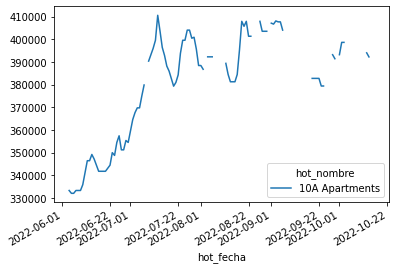

In [ ]:
training_df1=df6[cols1].astype(float)
plot_df1=training_df1                         #gráfica hotel en específico...Datos nulos como blanco 
plot_df1.plot.line()

In [ ]:
training_df1.shape

(325, 1)

In [ ]:
scalar= StandardScaler()
scalar=scalar.fit(training_df1)
training_df1_scaled=scalar.transform(training_df1)          #escalador

In [ ]:
trainX=[]          #creación de frames para entrenamiento
trainY=[]

n_past=20          #número de valores pasados a tener en cuenta para predecir 
n_fut=10              # número valores futuros

In [ ]:
for i in range(n_past, len(training_df1_scaled)-n_fut+1):
  trainX.append(training_df1_scaled[i-n_past:i,0:training_df1_scaled.shape[1]])       #escalar de nuevo entrenamiento y predicciones
  trainY.append(training_df1_scaled[i+n_fut-1:i+n_fut,0])

In [ ]:
trainX, trainY=np.array(trainX),np.array(trainY)

In [ ]:
print('trainX shape == {}'.format(trainX.shape))
print('trainY shape == {}'.format(trainY.shape))      

trainX shape == (296, 20, 1)
trainY shape == (296, 1)


In [ ]:
trainX=trainX.reshape(296,20,1)

In [ ]:
from keras.layers import Dropout

In [ ]:
model=Sequential()
model.add(LSTM(32,activation='relu',input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(32,activation='relu', return_sequences=True))
model.add(Dropout(0.3))                                             #creación del modelo, 96 capas LSTM, cada una con dropout de 0.3 y una capa densa

model.add(LSTM(32,activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam',loss='mse')              #selección de parámetros
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 32)            4352      
                                                                 
 dropout (Dropout)           (None, 20, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 32)            8320      
                                                                 
 dropout_1 (Dropout)         (None, 20, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 20, 32)            8320      
                                                                 
 dropout_2 (Dropout)         (None, 20, 32)            0         
                                                                 
 dense (Dense)               (None, 20, 1)             3

In [ ]:
history=model.fit(trainX, trainY, epochs=50, batch_size=5,validation_split=0.2, verbose=1) #historial y procesamiento del modelo

Epoch 1/50
48/48 [==============================] - 15s 103ms/step - loss: nan - val_loss: nan
Epoch 2/50
48/48 [==============================] - 2s 49ms/step - loss: nan - val_loss: nan
Epoch 3/50
48/48 [==============================] - 2s 36ms/step - loss: nan - val_loss: nan
Epoch 4/50
48/48 [==============================] - 1s 26ms/step - loss: nan - val_loss: nan
Epoch 5/50
48/48 [==============================] - 1s 26ms/step - loss: nan - val_loss: nan
Epoch 6/50
48/48 [==============================] - 1s 27ms/step - loss: nan - val_loss: nan
Epoch 7/50
48/48 [==============================] - 1s 26ms/step - loss: nan - val_loss: nan
Epoch 8/50
48/48 [==============================] - 1s 26ms/step - loss: nan - val_loss: nan
Epoch 9/50
48/48 [==============================] - 1s 26ms/step - loss: nan - val_loss: nan
Epoch 10/50
48/48 [==============================] - 1s 26ms/step - loss: nan - val_loss: nan
Epoch 11/50
48/48 [==============================] - 1s 26ms/step -

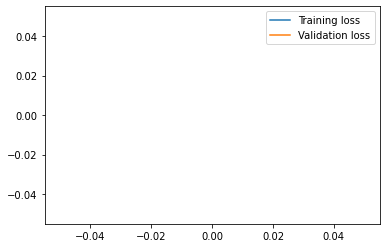

In [ ]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')     #no se visualiza por ser nan básicamente el modelo como se puede ver el historial
plt.legend()

In [ ]:
n_past=1
n_days_for_prediction=20

In [ ]:
predicted_period_dates=pd.date_range(list(training_dates)[-n_past],periods=n_days_for_prediction, freq='1M').tolist()  #predicción 

In [ ]:
prediction = model.predict(trainX[-n_days_for_prediction:])

1/1 [==============================] - 1s 508ms/step


In [ ]:
trainX.shape

(296, 20, 1)

In [ ]:
trainX.reshape(296,20,1)

array([[[        nan],
        [        nan],
        [        nan],
        ...,
        [        nan],
        [        nan],
        [        nan]],

       [[        nan],
        [        nan],
        [        nan],
        ...,
        [        nan],
        [        nan],
        [        nan]],

       [[        nan],
        [        nan],
        [        nan],
        ...,
        [        nan],
        [        nan],
        [        nan]],

       ...,

       [[-0.02572455],
        [        nan],
        [        nan],
        ...,
        [ 0.79578352],
        [        nan],
        [        nan]],

       [[        nan],
        [        nan],
        [ 0.1176971 ],
        ...,
        [        nan],
        [        nan],
        [ 0.31605254]],

       [[        nan],
        [ 0.1176971 ],
        [ 0.1176971 ],
        ...,
        [        nan],
        [ 0.31605254],
        [        nan]]])

In [ ]:
prediction_copies= np.repeat(prediction, training_df1.shape[1], axis=-1) #demasiados nan

In [ ]:
prediction_copies.shape

(20, 20, 1)

In [ ]:
prediction_copies=prediction_copies.reshape(20,20,)   #rehape para que al tener 2 dimensiones, llene los datos nann hacia atrás
prediction_copies.shape

(20, 20)

In [ ]:
y_pred_future = scalar.inverse_transform(prediction_copies)[:,0]

In [ ]:
forecast_dates = []
for time_i in predicted_period_dates:
  forecast_dates.append(time_i.date())

In [ ]:
df_forecast = pd.DataFrame ({'hot_fecha' :np.array(forecast_dates), '10A Apartments':y_pred_future})
df_forecast ['hot_fecha']=pd.to_datetime(df_forecast ['hot_fecha'])

<ipython-input-63-39d4e67fc2f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['hot_fecha']=pd.to_datetime(original['hot_fecha'])
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

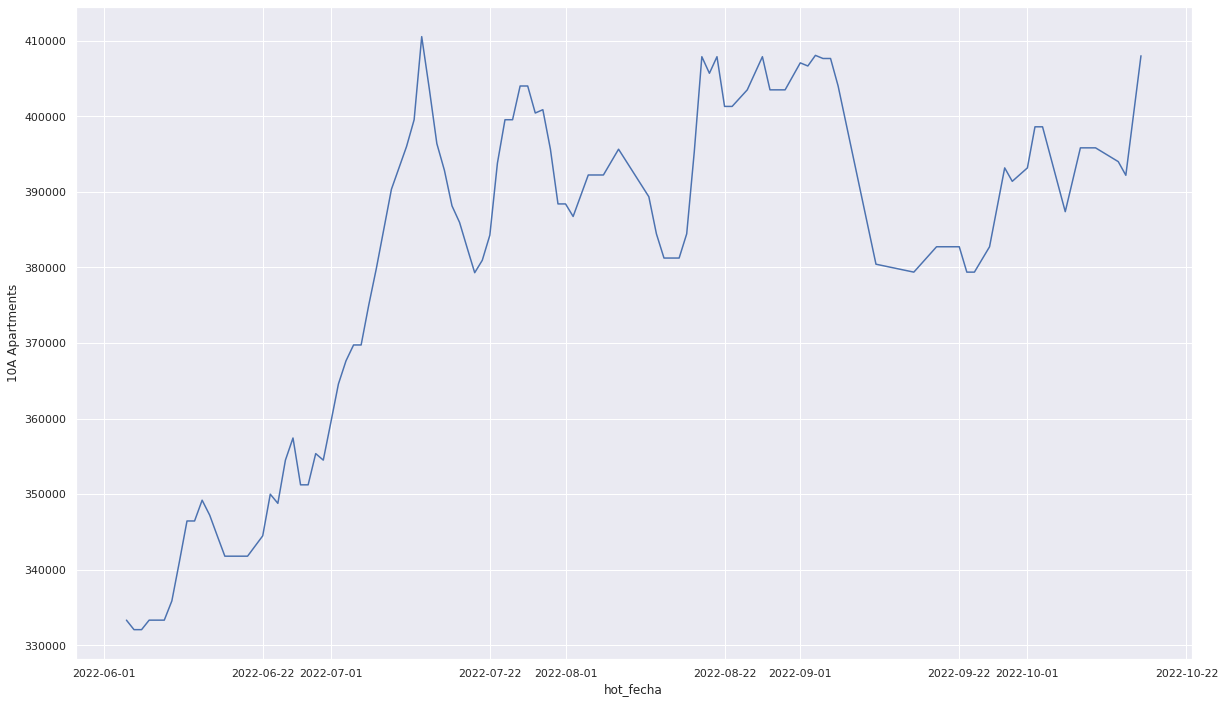

In [ ]:
original = df7 [['hot_fecha','10A Apartments']]
original['hot_fecha']=pd.to_datetime(original['hot_fecha'])
original=original.loc[original['hot_fecha'] >= '2021-08-24']

sns.set(rc ={'figure.figsize':(20,12)}) 
sns.lineplot(original['hot_fecha'], original['10A Apartments'])             #no se ve línea de predicción a futuro por el reshape anterior y porque se llenó hacia atrás
sns.lineplot(df_forecast['hot_fecha'], df_forecast['10A Apartments'])

#Att 1


In [ ]:
df7

hot_nombre,hot_fecha,10A Apartments,14 Urban Hotel,23 Hotel,3450 Living,35th Station Hostel,3H Hotel Av 70,4U Hostel,574 Hotel,61Prado Guesthouse,...,Villa de los Angeles,YOLO HOSTEL,Yellow House Hostel,York Luxury Suites,Your Home Away From Home,Your Home Away From Home Calasanz,Zojo Island Apartments,Zona Verde Hotel,hotel cabo de la vela,hotel torre primavera
0,2021-08-24,NaN,205426.5,NaN,NaN,62015.5,87209.5,75581.5,153100.5,69767.5,...,286822.0,170542.5,63953.5,529069.5,75581.5,50388.0,172480.5,217054.5,178294.5,NaN
1,2021-08-25,NaN,205426.5,NaN,NaN,62015.5,87209.5,75581.5,153100.5,69767.5,...,286822.0,170542.5,63953.5,529069.5,75581.5,50388.0,172480.5,217054.5,178294.5,NaN
2,2021-08-26,NaN,205426.5,NaN,NaN,62015.5,87209.5,75581.5,153100.5,69767.5,...,286822.0,170542.5,63953.5,529069.5,75581.5,50388.0,172480.5,217054.5,178294.5,NaN
3,2021-08-27,NaN,205426.5,NaN,NaN,62015.5,87209.5,75581.5,153100.5,69767.5,...,286822.0,170542.5,63953.5,529069.5,75581.5,50388.0,172480.5,217054.5,178294.5,NaN
4,2021-08-28,NaN,203846.0,NaN,NaN,61538.5,86538.5,75000.0,151923.5,69230.5,...,284615.0,169231.0,63461.5,525000.0,75000.0,50000.0,171154.0,215384.5,176923.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,2022-10-13,394009.0,297235.5,652074.0,NaN,NaN,138249.0,NaN,179723.5,117511.5,...,NaN,NaN,85253.5,NaN,76036.5,NaN,NaN,184332.0,131336.0,NaN
321,2022-10-14,392201.5,298165.5,NaN,NaN,61926.5,137615.0,64220.0,NaN,NaN,...,NaN,NaN,84862.5,NaN,75688.0,NaN,NaN,183486.0,NaN,NaN
322,2022-10-15,NaN,300926.0,645833.0,NaN,NaN,NaN,64815.0,180555.5,118055.5,...,NaN,NaN,85648.5,NaN,NaN,NaN,NaN,185185.5,131944.5,NaN
323,2022-10-16,408018.5,NaN,NaN,NaN,61321.0,NaN,66038.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136792.5,NaN


In [ ]:
df8=df7.set_index('hot_fecha')
df8

hot_nombre,10A Apartments,14 Urban Hotel,23 Hotel,3450 Living,35th Station Hostel,3H Hotel Av 70,4U Hostel,574 Hotel,61Prado Guesthouse,79 Hotel,...,Villa de los Angeles,YOLO HOSTEL,Yellow House Hostel,York Luxury Suites,Your Home Away From Home,Your Home Away From Home Calasanz,Zojo Island Apartments,Zona Verde Hotel,hotel cabo de la vela,hotel torre primavera
hot_fecha,,,,,,,,,,,,,,,,,,,,,
2021-08-24,NaN,205426.5,NaN,NaN,62015.5,87209.5,75581.5,153100.5,69767.5,120155.0,...,286822.0,170542.5,63953.5,529069.5,75581.5,50388.0,172480.5,217054.5,178294.5,NaN
2021-08-25,NaN,205426.5,NaN,NaN,62015.5,87209.5,75581.5,153100.5,69767.5,120155.0,...,286822.0,170542.5,63953.5,529069.5,75581.5,50388.0,172480.5,217054.5,178294.5,NaN
2021-08-26,NaN,205426.5,NaN,NaN,62015.5,87209.5,75581.5,153100.5,69767.5,120155.0,...,286822.0,170542.5,63953.5,529069.5,75581.5,50388.0,172480.5,217054.5,178294.5,NaN
2021-08-27,NaN,205426.5,NaN,NaN,62015.5,87209.5,75581.5,153100.5,69767.5,120155.0,...,286822.0,170542.5,63953.5,529069.5,75581.5,50388.0,172480.5,217054.5,178294.5,NaN
2021-08-28,NaN,203846.0,NaN,NaN,61538.5,86538.5,75000.0,151923.5,69230.5,119230.5,...,284615.0,169231.0,63461.5,525000.0,75000.0,50000.0,171154.0,215384.5,176923.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-13,394009.0,297235.5,652074.0,NaN,NaN,138249.0,NaN,179723.5,117511.5,NaN,...,NaN,NaN,85253.5,NaN,76036.5,NaN,NaN,184332.0,131336.0,NaN
2022-10-14,392201.5,298165.5,NaN,NaN,61926.5,137615.0,64220.0,NaN,NaN,NaN,...,NaN,NaN,84862.5,NaN,75688.0,NaN,NaN,183486.0,NaN,NaN
2022-10-15,NaN,300926.0,645833.0,NaN,NaN,NaN,64815.0,180555.5,118055.5,NaN,...,NaN,NaN,85648.5,NaN,NaN,NaN,NaN,185185.5,131944.5,NaN


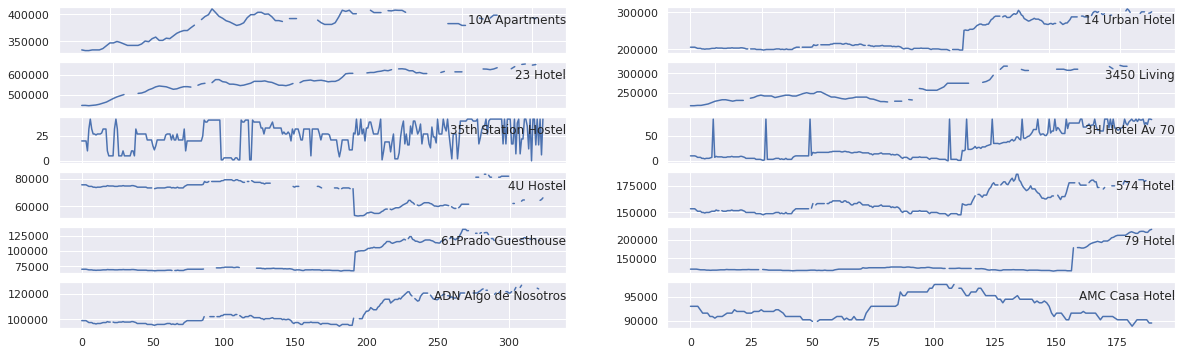

In [ ]:
values = df8.values
groups = [0,1,2,3,4,5,6,7,8,9,10,11]
i = 1
plt.figure()
for group in groups:
	plt.subplot(len(groups), 2, i)                                   #graficar variables respecto al tiempo
	plt.plot(values[:, group])
	plt.title(df8.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [ ]:
data_set = df8.reindex(index= df8.index[::-1])

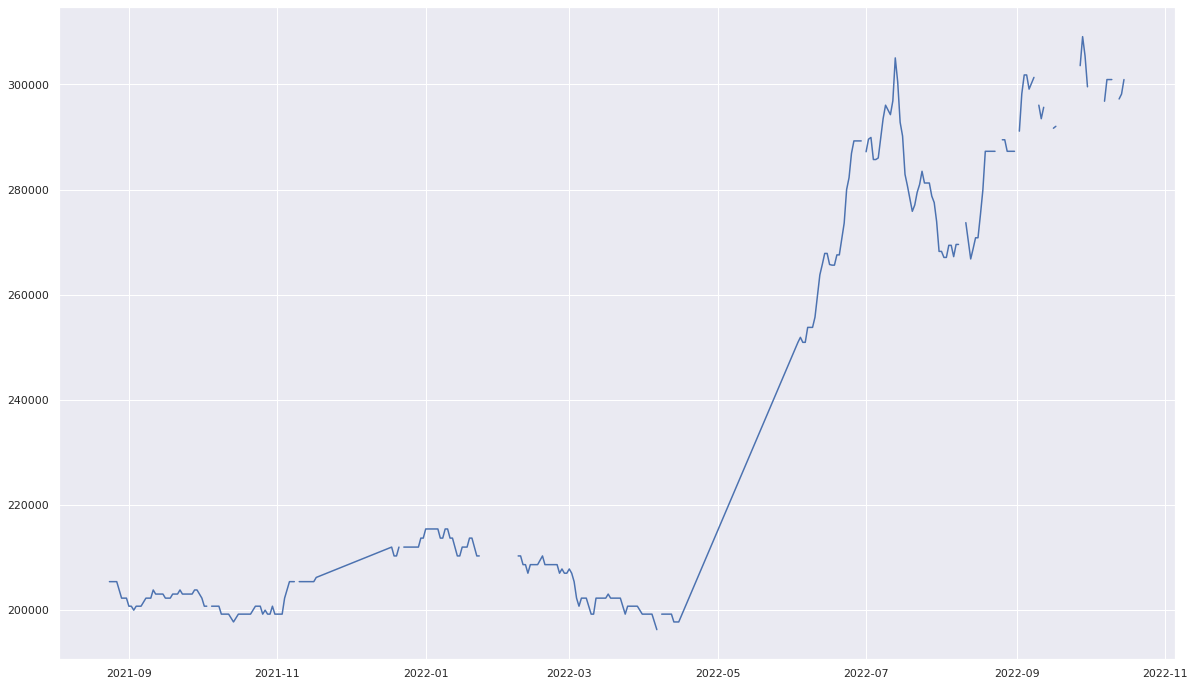

In [ ]:
plt.plot(data_set['14 Urban Hotel'])                #selecciona un hotel

In [ ]:
df8.shape

(325, 667)

In [ ]:
data_set = data_set[['14 Urban Hotel']]
scale = StandardScaler()
data_set = scale.fit_transform(data_set)                  #trasnsformación con escalador

In [ ]:
X = []
y = []
for i in np.arange(50,325):
  X.append(data_set[i-50:i,0])                  #seleccionar rango para variables para entrenamiento de la red
  y.append(data_set[i,0])

X = np.array(X)
y = np.array(y)

In [ ]:
X = X.reshape((-1,50,1))          #arreglo trdimencional requerido para LSTM

In [ ]:
y = y.reshape((-1,1))

In [ ]:
print(X.shape, y.shape)

(275, 50, 1) (275, 1)


In [ ]:

X_train, X_test , y_train,y_test = train_test_split(X,y)          #train test split

In [ ]:
X_train.shape

(206, 50, 1)

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True , input_shape=[None,1]),      #creación de red 40 capas LSTM, solo una densa a evaluar comportamiento
    keras.layers.LSTM(20),
    keras.layers.Dense(1)
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, None, 20)          1760      
                                                                 
 lstm_8 (LSTM)               (None, 20)                3280      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,061
Trainable params: 5,061
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='nadam')      #selección de parámetros

In [ ]:
y_predict = model.predict(X_test)

3/3 [==============================] - 2s 11ms/step


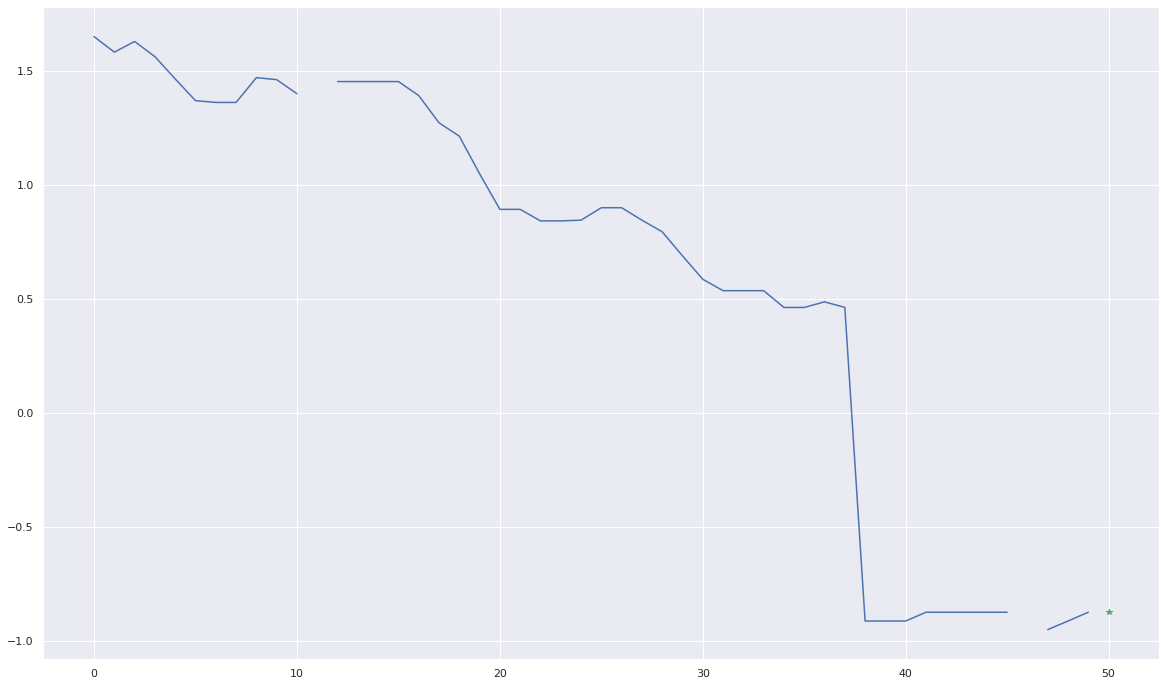

In [ ]:
plt.plot(X_test[0,:,0])
plt.plot(50, y_predict[0], 'r*')      #Plot de tendencia de datos de manera inversa con escalador 
plt.plot(50,y_test[0], 'g*')

In [ ]:
prediction = model.predict(data_set.reshape((1,-1,1)))

1/1 [==============================] - 0s 45ms/step


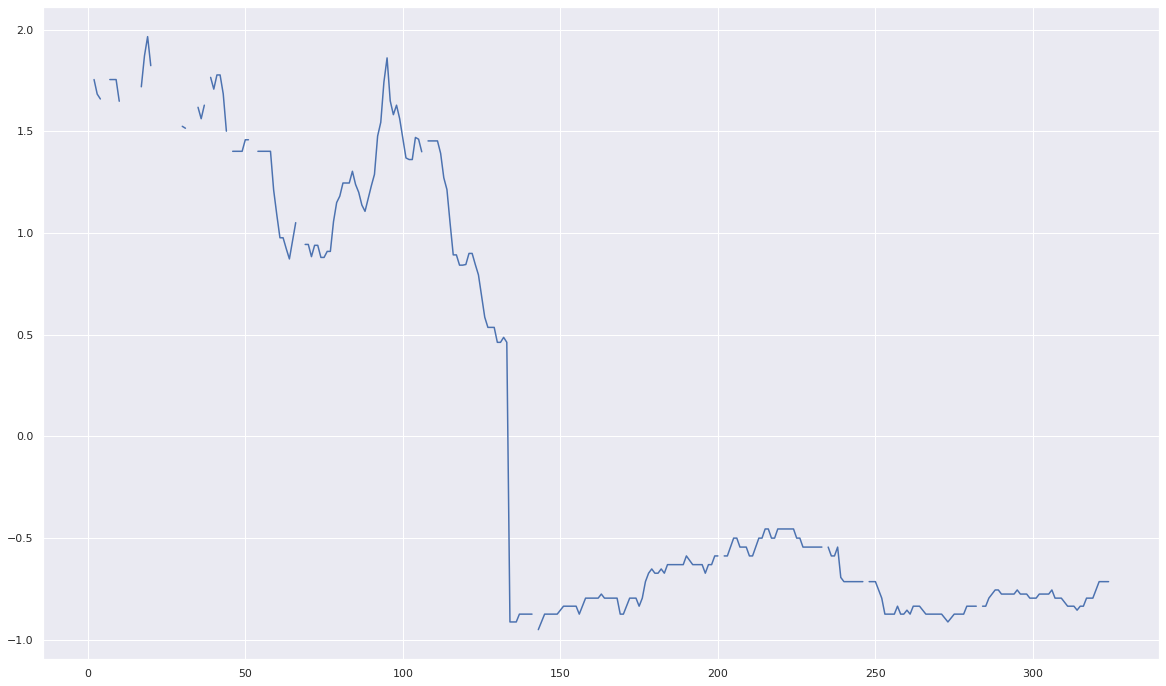

In [ ]:
plt.plot(data_set)
plt.plot(50,prediction, 'r*')       #plot con escalador inverso datos de predicción

#Attempt 2

In [ ]:
df7

hot_nombre,hot_fecha,10A Apartments,14 Urban Hotel,23 Hotel,3450 Living,35th Station Hostel,3H Hotel Av 70,4U Hostel,574 Hotel,61Prado Guesthouse,...,Villa de los Angeles,YOLO HOSTEL,Yellow House Hostel,York Luxury Suites,Your Home Away From Home,Your Home Away From Home Calasanz,Zojo Island Apartments,Zona Verde Hotel,hotel cabo de la vela,hotel torre primavera
0,2021-08-24,NaN,205426.5,NaN,NaN,62015.5,87209.5,75581.5,153100.5,69767.5,...,286822.0,170542.5,63953.5,529069.5,75581.5,50388.0,172480.5,217054.5,178294.5,NaN
1,2021-08-25,NaN,205426.5,NaN,NaN,62015.5,87209.5,75581.5,153100.5,69767.5,...,286822.0,170542.5,63953.5,529069.5,75581.5,50388.0,172480.5,217054.5,178294.5,NaN
2,2021-08-26,NaN,205426.5,NaN,NaN,62015.5,87209.5,75581.5,153100.5,69767.5,...,286822.0,170542.5,63953.5,529069.5,75581.5,50388.0,172480.5,217054.5,178294.5,NaN
3,2021-08-27,NaN,205426.5,NaN,NaN,62015.5,87209.5,75581.5,153100.5,69767.5,...,286822.0,170542.5,63953.5,529069.5,75581.5,50388.0,172480.5,217054.5,178294.5,NaN
4,2021-08-28,NaN,203846.0,NaN,NaN,61538.5,86538.5,75000.0,151923.5,69230.5,...,284615.0,169231.0,63461.5,525000.0,75000.0,50000.0,171154.0,215384.5,176923.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,2022-10-13,394009.0,297235.5,652074.0,NaN,NaN,138249.0,NaN,179723.5,117511.5,...,NaN,NaN,85253.5,NaN,76036.5,NaN,NaN,184332.0,131336.0,NaN
321,2022-10-14,392201.5,298165.5,NaN,NaN,61926.5,137615.0,64220.0,NaN,NaN,...,NaN,NaN,84862.5,NaN,75688.0,NaN,NaN,183486.0,NaN,NaN
322,2022-10-15,NaN,300926.0,645833.0,NaN,NaN,NaN,64815.0,180555.5,118055.5,...,NaN,NaN,85648.5,NaN,NaN,NaN,NaN,185185.5,131944.5,NaN
323,2022-10-16,408018.5,NaN,NaN,NaN,61321.0,NaN,66038.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136792.5,NaN


In [ ]:
df7.dtypes

hot_nombre
hot_fecha                            datetime64[ns]
10A Apartments                              float64
14 Urban Hotel                              float64
23 Hotel                                    float64
3450 Living                                 float64
                                          ...      
Your Home Away From Home Calasanz           float64
Zojo Island Apartments                      float64
Zona Verde Hotel                            float64
hotel cabo de la vela                       float64
hotel torre primavera                       float64
Length: 668, dtype: object

In [ ]:
df9=df7

In [ ]:
df9=df7[['hot_fecha','3H Hotel Av 70']]     #selección hotle por fecha
df9

hot_nombre,hot_fecha,3H Hotel Av 70
0,2021-08-24,87209.5
1,2021-08-25,87209.5
2,2021-08-26,87209.5
3,2021-08-27,87209.5
4,2021-08-28,86538.5
...,...,...
320,2022-10-13,138249.0
321,2022-10-14,137615.0
322,2022-10-15,NaN
323,2022-10-16,NaN


In [ ]:
df9['hot_fecha']

0     2021-08-24
1     2021-08-25
2     2021-08-26
3     2021-08-27
4     2021-08-28
         ...    
320   2022-10-13
321   2022-10-14
322   2022-10-15
323   2022-10-16
324   2022-10-17
Name: hot_fecha, Length: 325, dtype: datetime64[ns]

In [ ]:
df9.index = df9.pop('hot_fecha')        #indexación
df9

hot_nombre,3H Hotel Av 70
hot_fecha,
2021-08-24,87209.5
2021-08-25,87209.5
2021-08-26,87209.5
2021-08-27,87209.5
2021-08-28,86538.5
...,...
2022-10-13,138249.0
2022-10-14,137615.0
2022-10-15,NaN


In [ ]:
df9.columns

Index(['3H Hotel Av 70'], dtype='object', name='hot_nombre')

In [ ]:
df9['3H Hotel Av 70'].dropna()        #limpieza datos nulos

hot_fecha
2021-08-24     87209.5
2021-08-25     87209.5
2021-08-26     87209.5
2021-08-27     87209.5
2021-08-28     86538.5
                ...   
2022-10-10    141203.5
2022-10-12    137615.0
2022-10-13    138249.0
2022-10-14    137615.0
2022-10-17    141509.5
Name: 3H Hotel Av 70, Length: 299, dtype: float64

In [ ]:
df9=df9.dropna()
df9

hot_nombre,3H Hotel Av 70
hot_fecha,
2021-08-24,87209.5
2021-08-25,87209.5
2021-08-26,87209.5
2021-08-27,87209.5
2021-08-28,86538.5
...,...
2022-10-10,141203.5
2022-10-12,137615.0
2022-10-13,138249.0


In [ ]:
df9

hot_nombre,3H Hotel Av 70
hot_fecha,
2021-08-24,87209.5
2021-08-25,87209.5
2021-08-26,87209.5
2021-08-27,87209.5
2021-08-28,86538.5
...,...
2022-10-10,141203.5
2022-10-12,137615.0
2022-10-13,138249.0


In [ ]:
df9['3H Hotel Av 70'].astype(float)

hot_fecha
2021-08-24     87209.5
2021-08-25     87209.5
2021-08-26     87209.5
2021-08-27     87209.5
2021-08-28     86538.5
                ...   
2022-10-10    141203.5
2022-10-12    137615.0
2022-10-13    138249.0
2022-10-14    137615.0
2022-10-17    141509.5
Name: 3H Hotel Av 70, Length: 299, dtype: float64

In [ ]:
df9.dtypes

hot_nombre
3H Hotel Av 70    float64
dtype: object

In [ ]:
df9

hot_nombre,3H Hotel Av 70
hot_fecha,
2021-08-24,87209.5
2021-08-25,87209.5
2021-08-26,87209.5
2021-08-27,87209.5
2021-08-28,86538.5
...,...
2022-10-10,141203.5
2022-10-12,137615.0
2022-10-13,138249.0


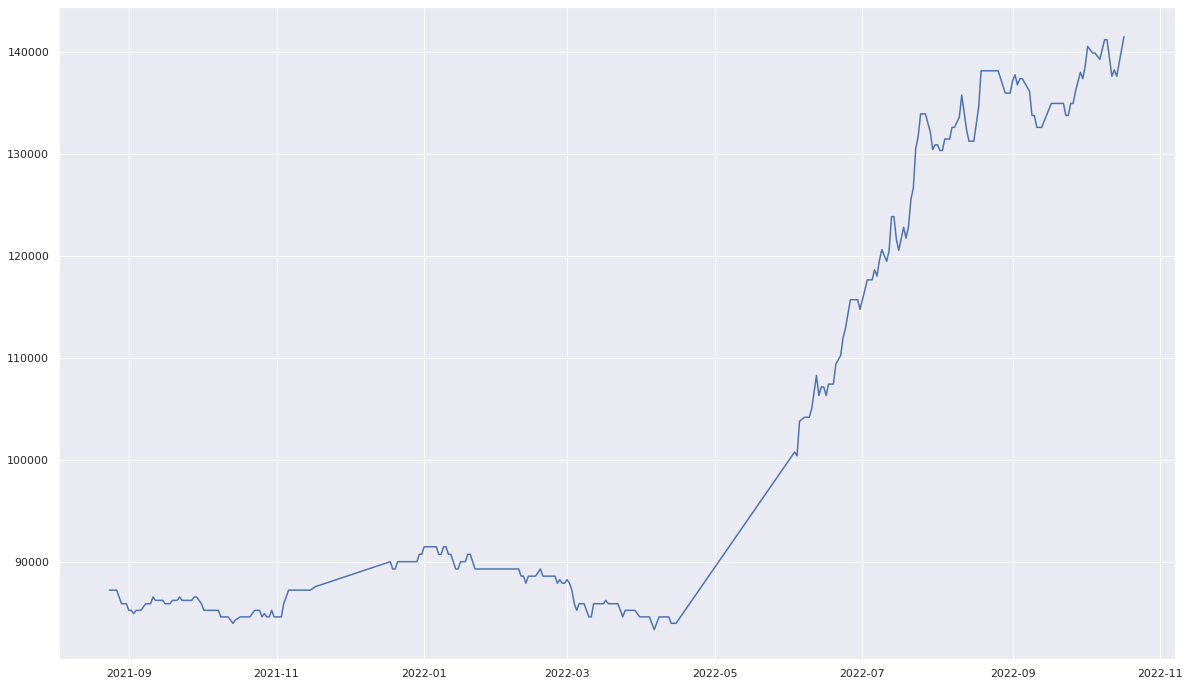

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df9.index, df9['3H Hotel Av 70'])          #gráfica 

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])      #(no relacionado con el dataset)
  return datetime.datetime(year=year, month=month, day=day)           #convertir str a datetime para futuros formatos

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
dateTimeStr=str(df9.index)

In [ ]:
df9.index.astype(str)

Index(['2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-28',
       '2021-08-29', '2021-08-30', '2021-08-31', '2021-09-01', '2021-09-02',
       ...
       '2022-10-02', '2022-10-04', '2022-10-05', '2022-10-07', '2022-10-09',
       '2022-10-10', '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-17'],
      dtype='object', name='hot_fecha', length=299)

In [ ]:
def df_to_windowed_df(df9, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)                                   #crea una función con datos de fechas para el hotel y generar una ventana

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = df9.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')      #elimina un error muy común
      return

    values = df_subset['3H Hotel Av 70'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = df9.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])              #selecciona las fechas y divide por días, semanas, meses y años para la predicción
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]                                              #Organiza los rangos del target
  
  ret_df['Target'] = Y                                                    

  return ret_df

windowed_df = df_to_windowed_df(df, 
                                '2021-08-24', 
                                '2022-10-17',                                       #establece y devuelve la ventana creada en la función def
                                n=3)
windowed_df

TypeError: ignored

In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))      # selecciona datos desde la matriz

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)         #datos de entrenamiento 

In [ ]:
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

In [ ]:
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]    #datos de validación
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]             #datos de testeo

In [ ]:
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)                                #gráfico de datos seleccionados para validacion, entreno y testeo

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),                  #creación del modelo y la red neuronal
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),                        #se establecen parámetros para la medición
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)                            #plot predicciones con datos de entrrenamiento
plt.plot(dates_train, y_train)
plt.legend(['Training Pons',redicti 'Training Observations'])

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)                                #plot predicciones con datos de validación
plt.plot(dates_val, y_val)                            
plt.legend(['Validation Predictions', 'Validation Observations'])

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)                                #plot predicciones con datos de testeo 
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',                         #plot datos iniciales vs datos predictivos para datos de validación, testeo y entreno
            'Training Observations',                                    
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()        #transformación datos a tiempo, recurriendo a la ventana creada anteriormente
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)              #plot final
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])